·TEST


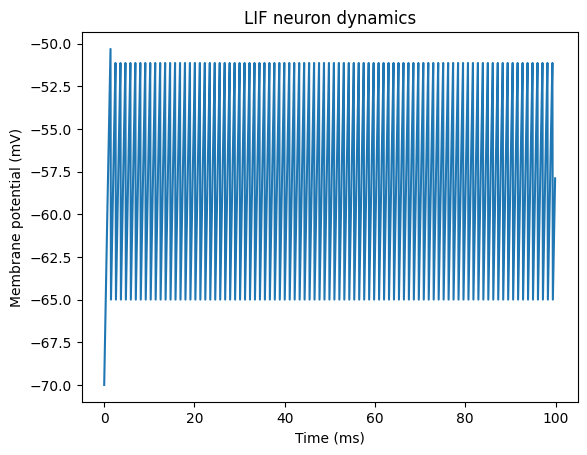

In [1]:
from brian2 import *

# Parâmetros
tau = 10*ms
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm
I = 1.5*nA

# Equação diferencial
eqs = '''
dv/dt = (-(v - v_rest) + R*I) / tau : volt
'''

# Neurônio
G = NeuronGroup(
    1,
    model=eqs,
    threshold='v > v_th',
    reset='v = v_reset',
    method='euler'
)

G.v = v_rest

# Monitor
M = StateMonitor(G, 'v', record=True)

# Simulação
run(100*ms)

# Plot
import matplotlib.pyplot as plt
plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("LIF neuron dynamics")
plt.show()


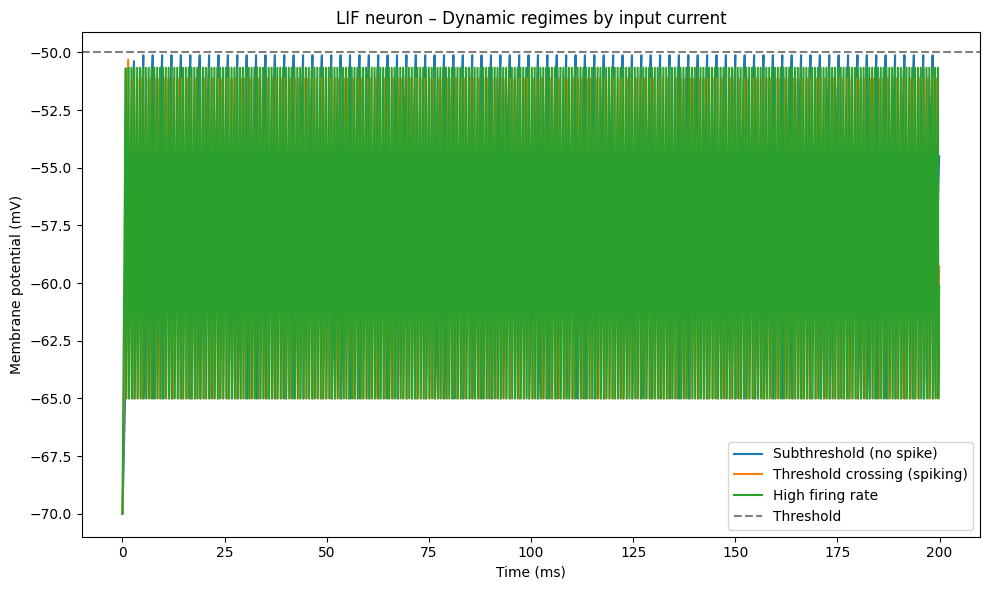

In [2]:
from brian2 import *
import matplotlib.pyplot as plt

# Parámetros generales
tau = 10*ms
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm

# Tres valores de corriente
currents = {
    "Subthreshold (no spike)": 0.8*nA,
    "Threshold crossing (spiking)": 1.5*nA,
    "High firing rate": 2.5*nA
}

# Crear figura
plt.figure(figsize=(10, 6))

for label, I in currents.items():

    # Definición del modelo
    eqs = '''
    dv/dt = (-(v - v_rest) + R*I) / tau : volt
    '''

    G = NeuronGroup(
        1,
        model=eqs,
        threshold='v > v_th',
        reset='v = v_reset',
        method='euler'
    )

    G.v = v_rest

    M = StateMonitor(G, 'v', record=True)

    run(200*ms)

    plt.plot(M.t/ms, M.v[0]/mV, label=label)

plt.axhline(v_th/mV, color='k', linestyle='--', alpha=0.5, label='Threshold')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("LIF neuron – Dynamic regimes by input current")
plt.legend()
plt.tight_layout()
plt.show()


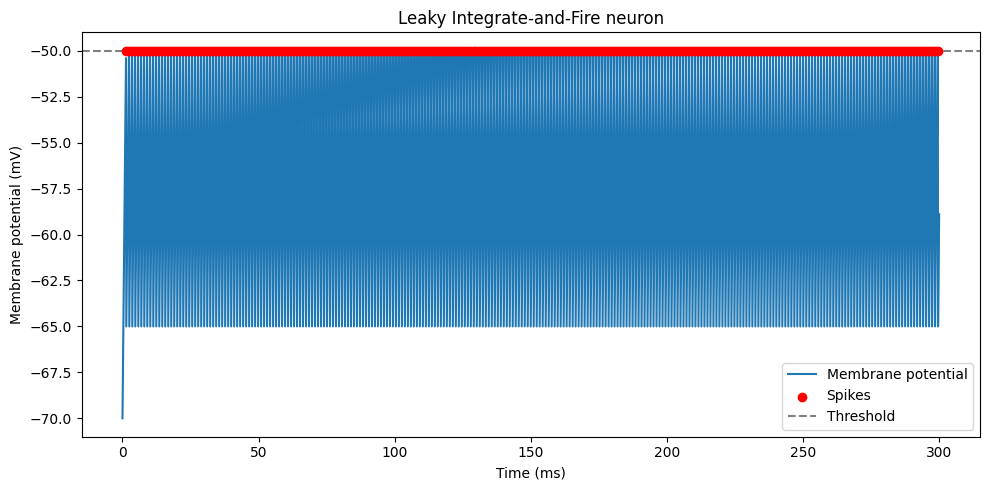

In [3]:
from brian2 import *
import matplotlib.pyplot as plt

# Parámetros
tau = 10*ms
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm
I = 1.6*nA   # corriente moderada

eqs = '''
dv/dt = (-(v - v_rest) + R*I) / tau : volt
'''

G = NeuronGroup(
    1,
    model=eqs,
    threshold='v > v_th',
    reset='v = v_reset',
    method='euler'
)

G.v = v_rest

M = StateMonitor(G, 'v', record=True)
S = SpikeMonitor(G)

run(300*ms)

# Plot
plt.figure(figsize=(10,5))
plt.plot(M.t/ms, M.v[0]/mV, label="Membrane potential")

plt.scatter(
    S.t/ms,
    [v_th/mV]*len(S.t),
    color='red',
    label="Spikes",
    zorder=3
)

plt.axhline(v_th/mV, linestyle='--', color='gray', label="Threshold")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Leaky Integrate-and-Fire neuron")
plt.legend()
plt.tight_layout()
plt.show()
